In [2]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd

import warnings
# @working path
FIG_PATH = "../tex/figs/"
WEB_FIG_PATH = "../tex/web-figs/"
DATA_PATH = "../code/"


# @global settings

FIG_DPI = 800
FIG_EXT = ".pdf"

# @global functions
def savefig(handler, name, fig_ext=FIG_EXT):
    if name != "":
        handler.savefig(
            FIG_PATH + name + fig_ext, dpi=FIG_DPI, bbox_inches="tight", pad_inches=0.1
        )


def parallelize_dataframe(n_cores, func, df, *args):
    df_split = np.array_split(df, n_cores)
    pool = Pool(n_cores)
    df = pd.concat(pool.starmap(func, [(d, *args) for d in df_split]))
    pool.close()
    pool.join()
    return df


def parallelize(n_cores, func, splited_data, *args):
    pool = Pool(n_cores)
    df = pool.starmap(func, [(d, *args) for d in splited_data])
    pool.close()
    pool.join()
    return df

Populating the interactive namespace from numpy and matplotlib


In [22]:
def draw_errors(data, method):
    test_num = len(data)
    fig = plt.figure(figsize=(4,3))
    ax = fig.add_subplot(1, 1, 1)
    ratio = 1
    
    for d, m in zip(data, method):
        ax.plot(d["time"], np.abs(d["$E_{tot}$"]), "-.", lw=1, label=m)
        ax.set_yscale("log")
        ax.set_xlabel("time")
        ax.set_ylabel("$\Delta E$")
        print(np.abs(d["$E_{tot}$"]).mean())
        
    ax.legend()
    #ax.set_xscale('log')
    #ax.set_xlim([1,1e6])
    plt.savefig('error-test')

In [32]:
matplotlib.matplotlib_fname()

'/home/yihanw/repositories/figure-std/matplotlibrc'

1.412451887205433e-11


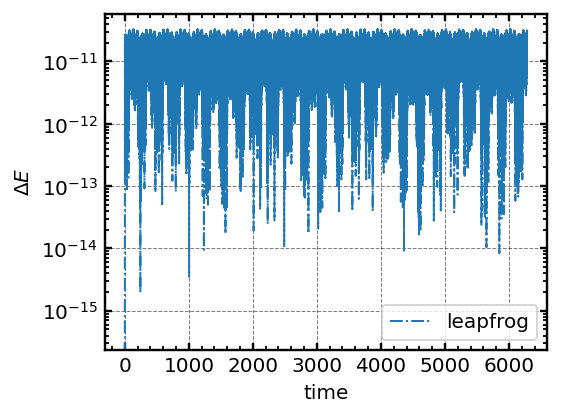

In [23]:
method = ['leapfrog']
#method = ["simple"]
fnames = ["build/earth-system-" + m + ".err" for m in method]
data = [pd.read_csv(name, names=["time", "$E_{tot}$"]) for name in fnames]
draw_errors(data, method)

3.55829768531772e-12
3.8558595190388876e-12
7.686909374569084e-12
1.41250960458079e-11
1.3929209059008143e-13


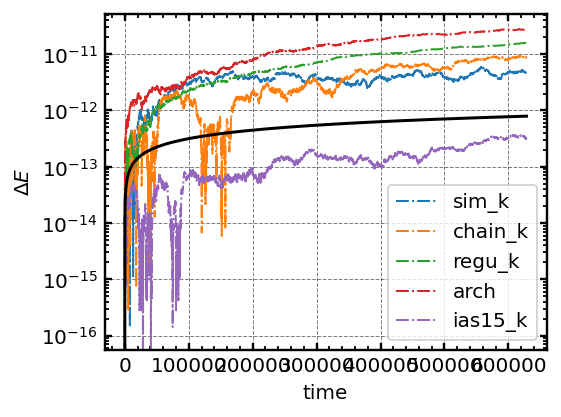

In [42]:
 method = ['sim_k', 'chain_k', 'regu_k', 'arch','ias15_k']
#method = ["simple"]
fnames = ["build/two-body-" + m + ".err" for m in method]
data = [pd.read_csv(name, names=["time", "$E_{tot}$"]) for name in fnames]
draw_errors(data, method)
# print(data)

In [ ]:
fnames = ["cmake-build-debug/ecc-BS-" + m + ".err" for m in method]
data = [pd.read_csv(name, names=["time", "$E_{tot}$"]) for name in fnames]
draw_errors(data, method)

In [ ]:
do = (energy["omega"] - energy["omega"][0]) / energy["omega"][0]
plt.plot(energy["time"], do, "-", lw=1)

In [ ]:
from decimal import *

getcontext().prec = 44

sub_steps = [
    "0",
    "0.0562625605369221464656521910318",
    "0.180240691736892364987579942780",
    "0.352624717113169637373907769648",
    "0.547153626330555383001448554766",
    "0.734210177215410531523210605558",
    "0.885320946839095768090359771030",
    "0.977520613561287501891174488626",
    "1",
]
p_step = [Decimal(h) for h in sub_steps]


def gen_c(p_step):
    l = []
    size = len(p_step)
    for i in range(size):
        x = []
        for j in range(i):
            x.append(Decimal(1))
            for k in range(len(x)):
                x[k] = x[k] / (p_step[i] - p_step[j])
        l.append(x)

    return l


def gen_r(p_step):
    l = []
    size = len(p_step)
    for i in range(size):
        x = []
        for j in range(i):
            x.append(1 / (p_step[i] - p_step[j]))
        l.append(x)

    return l


l = gen_r(p_step)

for i in p_step:
    print("{:.18E}".format(i), ",", end="")

for i in l:
    for x in i:
        print("{:.18E}".format(x), ",", end="")
    print("\n")


pos_cof = [
    Decimal(1.0),
    Decimal(1) / Decimal(2),
    Decimal(1) / Decimal(3),
    Decimal(1) / Decimal(2),
    Decimal(3) / Decimal(5),
    Decimal(2) / Decimal(3),
    Decimal(5) / Decimal(7),
    Decimal(3) / Decimal(4),
    Decimal(7) / Decimal(9),
]
vel_cof = [
    Decimal(1.0),
    Decimal(1) / Decimal(2),
    Decimal(2) / Decimal(3),
    Decimal(3) / Decimal(4),
    Decimal(4) / Decimal(5),
    Decimal(5) / Decimal(6),
    Decimal(6) / Decimal(7),
    Decimal(7) / Decimal(8),
]


def tab(h, cof):
    s = 1
    for x in cof:
        print("{:.18E}".format(s * x * h), ",", end="")
        s *= x * h


for p in p_step:
    if p != 0:
        print(Decimal(1) / p)


for p in p_step:
    tab(p, vel_cof)
    print("\n")

0.0 10000.000000000018
0.0 9999.999999999998
0.0 9999.999999999998
0.0 9999.999999999998


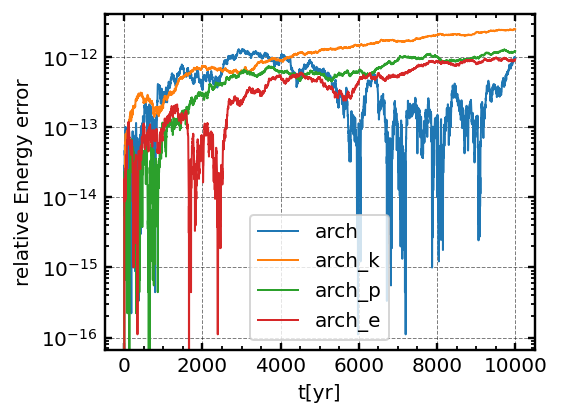

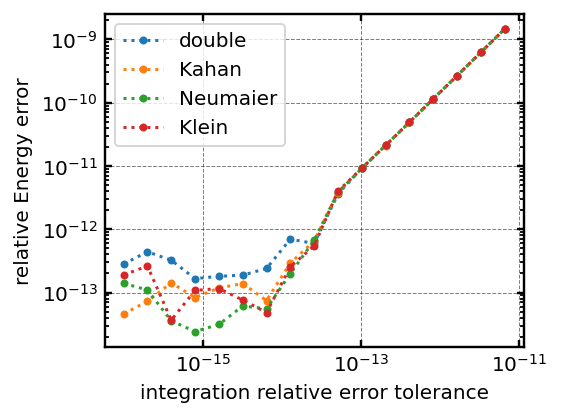

In [18]:
#sim_name = "test/regression_test/earth-system"
#sim_name = "build/earth-system"
sim_name = "build/two-body"
#sim_name = "build/kozai"
#sim_name = "test/regression_test/kozai"
#sim_suffix = ["sim", "regu", "chain", "arch_k"]
sim_suffix =['arch','arch_k','arch_p','arch_e']
labels = ['double','Kahan','Neumaier','Klein']
#sim_suffix = ["regu", "arch"]

fname = [sim_name + "-" + s for s in sim_suffix]

t_err = [np.loadtxt(f + ".err", delimiter=",") for f in fname]

err_scale = [np.loadtxt(f + ".scale") for f in fname]

fig = plt.figure(figsize=(4,3))
for te, name in zip(t_err, sim_suffix):
    plt.plot(
        te[:, 0] / np.pi / 2, np.abs(te[:, 1]), "-", label=name, lw=1, markersize=1
    )
    print(te[0,0]/(np.pi*2), te[-1,0]/(np.pi*2)  )
    plt.yscale("log")
    plt.xlabel("t[yr]")
    plt.ylabel("relative Energy error")
plt.legend()
#plt.xlim([180,190])
#plt.savefig('DKD-err.png',dpi=192,bbox_inches='tight')

figname = 'two-body'
plt.savefig(figname+'-errs.pdf')
fig = plt.figure(figsize=(4,3))
for e, name, l in zip(err_scale, sim_suffix, labels):
    plt.plot(e[0, :], np.abs(e[1, :]), '.:',label=l)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("integration relative error tolerance")
    plt.ylabel("relative Energy error")
plt.legend()
plt.savefig('active-err-scale.pdf')
#plt.savefig('DKD-scale.png',dpi=192,bbox_inches='tight')

In [7]:

fname = sim_name + '-regu.txt'



In [206]:
print(p_num, traj.keys())

3 dict_keys(['mass0', 'px0', 'py0', 'pz0', 'vx0', 'vy0', 'vz0', 'mass1', 'px1', 'py1', 'pz1', 'vx1', 'vy1', 'vz1', 'mass2', 'px2', 'py2', 'pz2', 'vx2', 'vy2', 'vz2', 'time'])


In [8]:
plt.scatter(traj['px0'],traj['py0'],s=0.3,lw=0)
plt.scatter(traj['px1'],traj['py1'],s=0.3,lw=0)
plt.scatter(traj['px2'],traj['py2'],s=0.3,lw=0)

NameError: name 'traj' is not defined

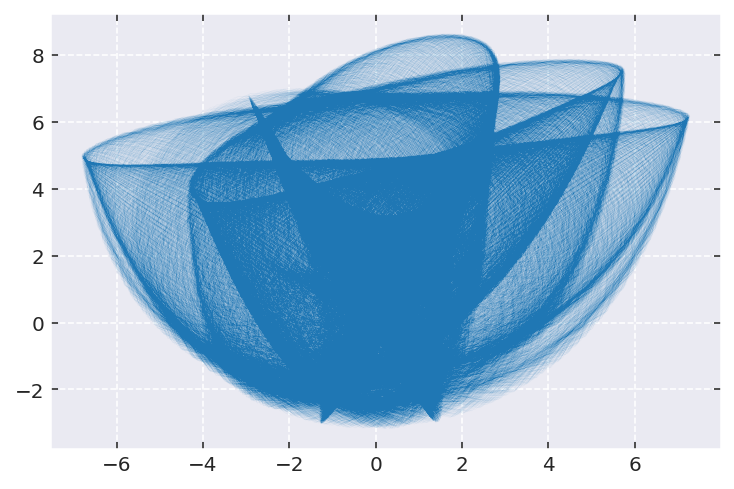

In [200]:
plt.figure()
xdata = traj[x][idx==1]-traj[x][idx==0]
ydata = traj[y][idx==1]-traj[y][idx==0]
plt.plot(xdata,ydata,lw=0.01)


In [5]:
import sys
sys.path.append("../dynapy")
import orbits as ob
%pylab inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


/home/yihanw/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['savefig']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


[0.00000000e+00 1.42080001e-05 4.95284070e-04 ... 4.71253356e+00
 4.71322476e+00 4.71346628e+00]


../dynapy/orbits.py:165: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(cos)


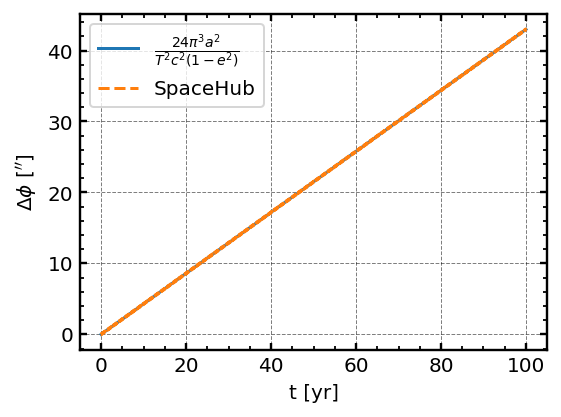

In [66]:
sim_name = "build/PN-precession"
sim_suffix = ["sim", "regu", "chain", "arch"]
sim_suffix = ["arch"]
colors = ['r','b','g','k']
plt.figure(figsize=(4,3))
for suffix, color in zip(sim_suffix,colors):
    p_num, traj=ob.load_spacehub_data(sim_name+'-'+suffix+'.txt')
    ex,ey, ez = ob.get_ecc(traj, 0,1)
    e = np.sqrt(ex**2+ey**2+ez**2)
    a = ob.get_sma(traj,0,1)
    T = np.pi*2*np.sqrt(   a**3 / (ob.const_G*ob.get_tot_mass(traj,(0,1))))
    dphi = 24*np.pi**3*a**2/T**2/ob.const_C**2/(1-e**2)
    phi = dphi * 3600 *t/T *ob.const_yr
    print(phi)
    theta = ob.calc_angle(ex[0], ey[0], ez[0], ex, ey, ez)/ob.const_deg
    
    t = traj['time']
    
    
    plt.plot(t/ob.const_yr, 42.98*t/ob.const_yr/100,label='$\\frac{24\pi^3a^2}{T^2c^2(1-e^2)}$')
    plt.plot(t/ob.const_yr, theta*3600,ls='--',label='SpaceHub')
    
    
    plt.xlabel('t [yr]')
    plt.ylabel('$\Delta \phi$ [$^{\prime\prime}$]')
    plt.legend()
    plt.savefig('GR-precession.pdf')

    #print(ex[0], ey[0], ez[0], ex[-1], ey[-1], ez[-1],theta)

In [38]:
def dedt(m1, m2, a, e):
    M = m1+ m2
    q = m1/m2
    c5 = ob.const_C **5
    g3 = ob.const_G **3
    return -e*304.0/15/c5*g3*M**3*q/(a**4*(1+q)**2*(1-e**2)**2.5)*(1+121/304.0*e**2)

[0.00000000e+00 9.94736802e-10 1.11448982e-03 ... 1.11386180e+01
 1.11397321e+01 1.11408460e+01]


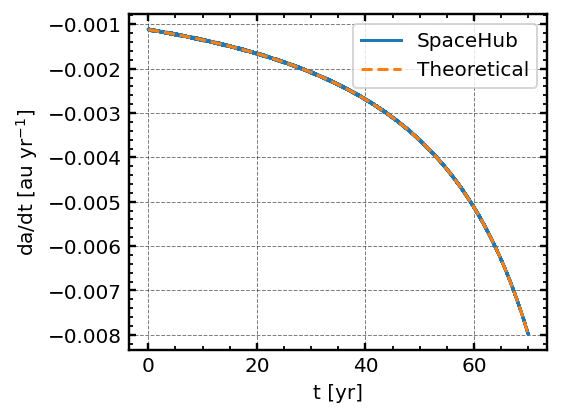

In [60]:
sim_name = "build/PN-radiation"
sim_suffix = ['arch']#["sim", "regu", "chain", "arch"]

for suffix in sim_suffix:
    p_num, traj=ob.load_spacehub_data(sim_name+'-'+suffix+'.txt')
    ex,ey, ez = ob.get_ecc(traj, 0,1)
    a = ob.get_sma(traj,0,1)
    e = ob.calc_norm(ex, ey, ez)
    #theta = ob.calc_angle(ex[0], ey[0], ez[0], ex, ey, ez)/ob.const_deg
    de = dedt(traj['mass0'], traj['mass1'],a,e)*ob.const_yr
    
    t = traj['time']/ob.const_yr
    
    print(t/ob.const_yr)
    
    desim = ((e[1::]-e[0:-1])/(t[1::]-t[0:-1]))[1::]
    
    #plt.figure(figsize=(4,3))
    #plt.plot(t/ob.const_yr, e,lw=0.5)
    
    plt.figure(figsize=(4,3))
    plt.plot(  ((t[1::]+t[0:-1])/2)[1::], desim,label='SpaceHub')
    plt.plot(t, de,ls='--',label='Theoretical')
    
    plt.xlabel('t [yr]')
    plt.ylabel('da/dt [au ${\\rm yr}^{-1}$]')
    #plt.yscale('symlog')
    #print(a)
    plt.legend()
    plt.savefig('GR-radiation.pdf')
    #print(ex[0], ey[0], ez[0], ex[-1], ey[-1], ez[-1],theta)

In [60]:
p_num, traj=ob.load_spacehub_data('build/kozai-arch.txt')

In [74]:
t = traj['time']
ex,ey, ez = ob.get_ecc(traj, 0,1)

e = ob.calc_norm(ex, ey, ez)

In [75]:
lx,ly, lz = ob.get_L(traj, 0,1)

Lx,Ly, Lz = ob.get_L(traj, (0,1),2)

Ltx = Lx + lx
Lty = Ly + ly
Ltz = Lz + lz
Lt = ob.calc_norm(Ltx, Lty, Ltz)

theta = ob.calc_angle(Ltx, Lty, Ltz, lx, ly, lz)/ob.const_deg

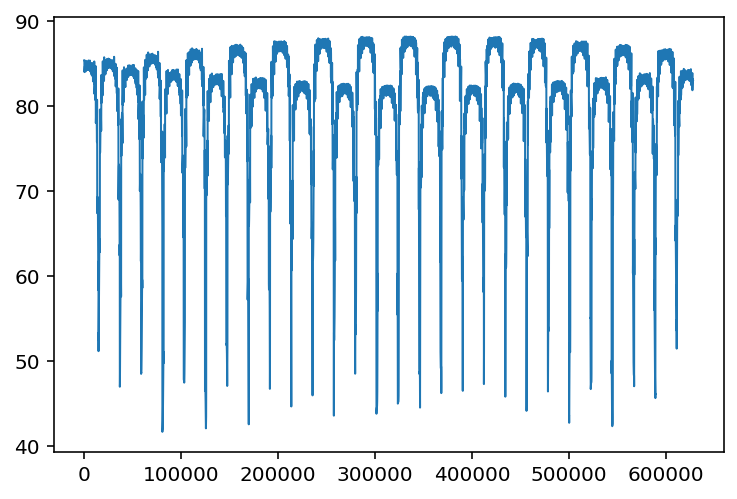

In [78]:
plt.plot(t,theta,lw=1)